## Quantum Integer Programming and Quantum Machine Learning 47-779/785, Tepper School of Business.
## Introduction to Quantum Computing 18-819F, Electrical and Computers Engineering.
## Fall 2021, Carnegie Mellon University

*IBM Quantum Challenge Fall 2021*

Challenge 1: Optimizing your portfolio with quantum computers

Run in **[Google Colab](https://colab.research.google.com/github/bernalde/QuIPML/blob/main/notebooks/Challenge%201%20-%20Optimizing%20your%20portfolio%20with%20quantum%20computers.ipynb)**

## Introduction: What is portfolio optimization?
Portfolio optimization is a crucial process for anyone who wants to maximize returns from their investments. 
Investments are usually a collection of so-called assets (stock, credits, bonds, derivatives, calls, puts, etc..) and this collection of assets is called a **portfolio**. 
<center><img src="resources/ex1-01.png" width="270"></center>
The goal of portfolio optimization is to minimize risks (financial loss) and maximize returns (financial gain). But this process is not as simple as it may seem. Gaining high returns with little risk is indeed too good to be true. Risks and returns usually have a trade-off relationship which makes optmizing your portfolio a little more complicated. As Dr. Harry Markowitz states in his Modern Portfolio Theory he created in 1952,  "risk is an inherrent part of higher reward."

**Modern Portfolio Theory (MPT)** <br>
An investment theory based on the idea that investors are risk-averse, meaning that when given two portfolios that offer the same expected return they will prefer the less risky one. Investors can construct portfolios to maximize expected return based on a given level of market risk, emphasizing that risk is an inherent part of higher reward. It is one of the most important and influential economic theories dealing with finance and investment. Dr. Harry Markowitz created the modern portfolio theory (MPT) in 1952 and won the Nobel Prize in Economic Sciences in 1990 for it. <br><br>
**Reference:** [<b>Modern Portfolio Theory<i>](https://en.wikipedia.org/wiki/Modern_portfolio_theory)

## Challenge

<div class="alert alert-block alert-success">

**Goal**

Portfolio optimization is a crucial process for anyone who wants to maximize returns from their investments. In this first challenge, you will learn some of the basic theory behind portfolio optimization and how to formulate the problem so it can be solved by quantum computers. During the process, you will learn about Qiskit's Finance application class and methods to solve the problem efficiently.

1. **Challenge 1a**: Learn how to use the PortfolioOptimization() method in Qiskit's Finance module to convert the portfolio optimization into a quadratic program.
    
2. **Challenge 1b**: Implement VQE to solve a four-stock portfolio optimization problem based on the instance created in challenge 1a.
    
    
3. **Challenge 1c**: Solve the same problem using QAOA with three budgets and double weights for any of the assets in your portfolio. 

</div>
<div class="alert alert-block alert-info">

Before you begin, we recommend watching the [**Qiskit Finance Demo Session with Julien Gacon**](https://youtu.be/UtMVoGXlz04?t=2022) and check out the corresponding [**demo notebook**](https://github.com/qiskit-community/qiskit-application-modules-demo-sessions/tree/main/qiskit-finance) to learn about Qiskit's Finance module and its appications in portfolio optimization.

</div>

## 1. Finding the efficient frontier
The Modern portfolio theory (MPT) serves as a general framework to determine an ideal portfolio for investors.  The MPT is also referred to as mean-variance portfolio theory because it assumes that any investor will choose the optimal portfolio from the set of portfolios that
- Maximizes expected return for a given level of risk; and
- Minimizes risks for a given level of expected returns.

The figure below shows the minimum variance frontier of modern portfolio theory where the horizontal axis shows the risk and the vertical axis shows expected return.  

<center><img src="resources/ex1-02.png" width="600"></center>

Consider a situation where you have two stocks to choose from: A and B. You can invest your entire wealth in one of these two stocks. Or you can invest 10% in A and 90% in B, or 20% in A and 80% in B, or 70% in A and 30% in B, etc ... There is a huge number of possible combinations and this is a simple case when considering two stocks. Imagine the different combinations you have to consider when you have thousands of stocks.

The minimum variance frontier shows the minimum variance that can be achieved for a given level of expected return. To construct a minimum-variance frontier of a portfolio:

- Use historical data to estimate the mean, variance of each individual stock in the portfolio, and the correlation of each pair of stocks.
- Use a computer program to find out the weights of all stocks that minimize the portfolio variance for each pre-specified expected return.
- Calculate the expected returns and variances for all the minimum variance portfolios determined in step 2 and then graph the two variables.

Investors will never want to hold a portfolio below the minimum variance point. They will always get higher returns along the positively sloped part of the minimum-variance frontier. And the positively sloped part of the minimum-variance frontier is called the **efficient frontier**.

The **efficient frontier** is where the optimal portfolios are. And it helps narrow down the different portfolios from which the investor may choose. 


## 2. Goal Of Our Exercise
The goal of this exercise is to find the efficent frontier for an inherent risk using a quantum approach. We will use Qiskit's Finance application modules to convert our portfolio optimization problem into a quadratic program so we can then use variational quantum algorithms such as VQE and QAOA to solve our optimization problem. Let's first start by looking at the actual problem we have at hand. 

## 3. Four-Stock Portfolio Optimization Problem

Let us consider a portfolio optimization problem where you have a total of four assets (e.g. STOCK0, STOCK1, STOCK2, STOCK3) to choose from. Your goal is to find out a combination of two assets that will minimize the tradeoff between risk and return which is the same as finding the efficient frontier for the given risk. 

## 4. Formulation

How can we formulate this problem?<br>
The function which describes the efficient frontier can be formulated into a quadratic program with linear constraints as shown below. <br>
The terms that are marked in red are associated with risks and the terms in blue are associated with returns.
You can see that our goal is to minimize the tradeoff between risk and return. In general, the function we want to optimize is called an objective function. <br> <br>

<div align="center"> <font size=5em >$\min_{x \in \{0, 1\}^n}: $</font> <font color='red', size=5em >$q x^n\Sigma x$</font> - <font color='blue', size=5em>$\mu^n x$</font> </div>

<div align="center"> <font size=5em >$subject$</font> <font size=5em >$to: 1^n x = B$</font> </div>


- <font size=4em >$x$</font> indicates asset allocation.
- <font size=4em >$Σ$</font> (sigma) is a covariance matrix. 
A covariance matrix is a useful math concept that is widely applied in financial engineering. It is a statistical measure of how two asset prices are varying with respect to each other. When the covariance between two stocks is high, it means that one stock experiences heavy price movements and is volatile if the price of the other stock changes.
- <font size=4em >$q$</font> is called a risk factor (risk tolerance), which is an evaluation of an individual's willingness or ability to take risks. For example, when you use the automated financial advising services, the so-called robo-advising, you will usually see different risk tolerance levels. This q value is the same as such and takes a value between 0 and 1. 
- <font size=4em >$𝝁$</font> (mu) is the expected return and is something we obviously want to maximize.
- <font size=4em >$n$</font> is the number of different assets we can choose from
- <font size=4em >$B$</font> stands for Budget.
And budget in this context means the number of assets we can allocate in our portfolio. 



#### Goal:
Our goal is to find the **x** value. The x value here indicates which asset to pick (𝑥[𝑖]=1) and which not to pick (𝑥[𝑖]=0). 


#### Assumptions:
We assume the following simplifications:
- all assets have the same price (normalized to 1),
- the full budget $B$ has to be spent, i.e. one has to select exactly $B$ assets.
- the equality constraint $1^n x = B$ is mapped to a penalty term $(1^n x - B)^2$ which is scaled by a parameter and subtracted from the objective function. 


## Step 1. Import necessary libraries

In [1]:
#Let us begin by importing necessary libraries.
from qiskit import Aer
from qiskit.algorithms import VQE, QAOA, NumPyMinimumEigensolver
from qiskit.algorithms.optimizers import *
from qiskit.circuit.library import TwoLocal
from qiskit.utils import QuantumInstance
from qiskit.utils import algorithm_globals
from qiskit_finance import QiskitFinanceError
from qiskit_finance.applications.optimization import PortfolioOptimization
from qiskit_finance.data_providers import *
from qiskit_optimization.algorithms import MinimumEigenOptimizer 
from qiskit_optimization.applications import OptimizationApplication
from qiskit_optimization.converters import QuadraticProgramToQubo
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import warnings
from sympy.utilities.exceptions import SymPyDeprecationWarning
warnings.simplefilter("ignore", SymPyDeprecationWarning)

## Step 2. Generate time series data (Financial Data)
Let's first generate a random time series financial data for a total number of stocks n=4. We use RandomDataProvider for this. We are going back in time and retrieve financial data from November 5, 1955 to October 26, 1985.

In [2]:
# Set parameters for assets and risk factor
num_assets = 4     # set number of assets to 4
q = 0.5                   # set risk factor to 0.5
budget = 2           # set budget as defined in the problem
seed = 132     #set random seed

# Generate time series data
stocks = [("STOCK%s" % i) for i in range(num_assets)]
data = RandomDataProvider(tickers=stocks,
                 start=datetime.datetime(1955,11,5),   
                 end=datetime.datetime(1985,10,26),  
                 seed=seed)
data.run()

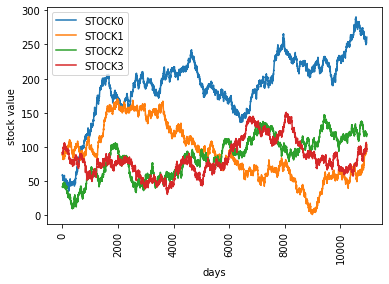

In [3]:
# Let's plot our finanical data
for (cnt, s) in enumerate(data._tickers):
    plt.plot(data._data[cnt], label=s)
plt.legend()
plt.xticks(rotation=90)
plt.xlabel('days')
plt.ylabel('stock value')
plt.show()

<div id='problem'></div>
<div class="alert alert-block alert-danger">
    
**WARNING** Please do not change the start/end dates that are given to the RandomDataProvider in this challenge. Otherwise, your answers will not be graded properly.
</div>

## Step 3. Quadratic Program Formulation

Let's generate the expected return first and then the covariance matrix which are both needed to create our portfolio.

### Expected Return μ
Expected return of a portfolio is the anticipated amount of returns that a portfolio may generate, making it the mean (average) of the portfolio's possible return distribution. 
For example, let's say stock A, B and C each weighted 50%, 20% and 30% respectively in the portfolio.  If the expected return for each stock was 15%, 6% and 9% respectively, the expected return of the portfolio would be:


<div align="center"> μ = (50% x 15%) + (20% x 6%) + (30% x 9%) = 11.4% </div>

For the problem data we generated earlier, we can calculate the expected return over the 30 years period from 1955 to 1985 by using the following `get_period_return_mean_vector()` method which is provided by Qiskit's RandomDataProvider.

In [4]:
#Let's calculate the expected return for our problem data

mu = data.get_period_return_mean_vector()   # Returns a vector containing the mean value of each asset's expected return.

print(mu)

[1.59702144e-04 4.76518943e-04 2.39123234e-04 9.85029012e-05]


### Covariance Matrix Σ
Covariance Σ is a statistical measure of how two asset's mean returns vary with respect to each other and helps us understand the amount of risk involved from an investment portfolio's perspective to make an informed decision about buying or selling stocks. 

If you have 'n' stocks in your porfolio, the size of the covariance matrix will be n x n.
Let us plot the covariance marix for our 4 stock portfolio which will be a 4 x 4 matrix. 

[[ 4.88319903e-05 -1.07868619e-06 -2.12961489e-06  7.06600109e-07]
 [-1.07868619e-06  9.97360142e-04  3.51594354e-06  3.68715793e-07]
 [-2.12961489e-06  3.51594354e-06  2.87365468e-04  3.20819120e-06]
 [ 7.06600109e-07  3.68715793e-07  3.20819120e-06  1.92316728e-04]]


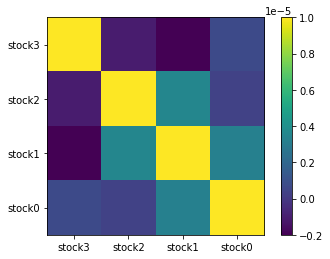

In [5]:
# Let's plot our covariance matrix Σ（sigma）
sigma = data.get_period_return_covariance_matrix() #Returns the covariance matrix of the four assets
print(sigma)
fig, ax = plt.subplots(1,1)
im = plt.imshow(sigma, extent=[-1,1,-1,1])
x_label_list = ['stock3', 'stock2', 'stock1', 'stock0']
y_label_list = ['stock3', 'stock2', 'stock1', 'stock0']
ax.set_xticks([-0.75,-0.25,0.25,0.75])
ax.set_yticks([0.75,0.25,-0.25,-0.75])
ax.set_xticklabels(x_label_list)
ax.set_yticklabels(y_label_list)
plt.colorbar()
plt.clim(-0.000002, 0.00001)
plt.show()

The left-to-right diagonal values (yellow boxes in the figure below) show the relation of a stock with 'itself'. And the off-diagonal values show the deviation of each stock's mean expected return with respect to each other.  A simple way to look at a covariance matrix is:

 - If two stocks increase and decrease simultaneously then the covariance value will be positive.
 - If one increases while the other decreases then the covariance will be negative.

<center><img src= "resources/ex1-05.png" width="370"></center>

You may have heard the phrase "Don't Put All Your Eggs in One Basket." If you invest in things that always move in the same direction, there will be a risk of losing all your money at the same time. Covariance matrix is a nice measure to help investors diversify their assets to reduce such risk. 

Now that we have all the values we need to build our portfolio for optimization, we will look into Qiskit's Finance application class that will help us contruct the quadratic program for our problem.

## Qiskit Finance application class

In Qiskit, there is a dedicated [`PortfolioOptimization`](https://qiskit.org/documentation/finance/stubs/qiskit_finance.applications.PortfolioOptimization.html#qiskit_finance.applications.PortfolioOptimization) application to construct the quadratic program for portfolio optimizations.

PortfolioOptimization class creates a porfolio instance by taking the following **five arguments** then converts the instance into a quadratic program.

Arguments of the PortfolioOptimization class:
- expected_returns
- covariances
- risk_factor
- budget
- bounds

Once our portfolio instance is converted into a quadratic program, then we can use quantum variational algorithms suchs as Variational Quantum Eigensolver (VQE) or the Quantum Approximate Optimization Algorithm (QAOA) to find the optimal solution to our problem.<br>

We already obtained expected_return and covariances from Step 3 and have risk factor and budget pre-defined. So, let's build our portfolio using the [`PortfolioOptimization`](https://qiskit.org/documentation/finance/stubs/qiskit_finance.applications.PortfolioOptimization.html#qiskit_finance.applications.PortfolioOptimization) class.


## Challenge 1a: Create the portfolio instance using PortfolioOptimization class
<div id='u-definition'></div>
<div class="alert alert-block alert-success">

**Challenge 1a** <br>
Complete the code to generate the portfolio instance using the [**PortfolioOptimization**](https://qiskit.org/documentation/finance/stubs/qiskit_finance.applications.PortfolioOptimization.html#qiskit_finance.applications.PortfolioOptimization) class. Make sure you use the **five arguments** and their values which were obtained in the previos steps and convert the instance into a quadratic program **qp**. 
</div>

<div id='problem'></div>
<div class="alert alert-block alert-info">
    
**Note:** A binary list [1. 1. 0. 0.] indicates a portfolio consisting STOCK2 and STOCK3.
    
</div>

In [7]:
##############################

# Provide your code here

portfolio = PortfolioOptimization(mu, sigma, q, budget, bounds = None)
qp = portfolio.to_quadratic_program()

##############################
print(qp)

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: Portfolio optimization

Minimize
 obj: - 0.000159702144 x_0 - 0.000476518943 x_1 - 0.000239123234 x_2
      - 0.000098502901 x_3 + [ 0.000048831990 x_0^2 - 0.000002157372 x_0*x_1
      - 0.000004259230 x_0*x_2 + 0.000001413200 x_0*x_3 + 0.000997360142 x_1^2
      + 0.000007031887 x_1*x_2 + 0.000000737432 x_1*x_3 + 0.000287365468 x_2^2
      + 0.000006416382 x_2*x_3 + 0.000192316728 x_3^2 ]/2
Subject To
 c0: x_0 + x_1 + x_2 + x_3 = 2

Bounds
 0 <= x_0 <= 1
 0 <= x_1 <= 1
 0 <= x_2 <= 1
 0 <= x_3 <= 1

Binaries
 x_0 x_1 x_2 x_3
End



If you were able to successfully generate the code, you should see a standard representation of the formulation of our qudratic program. 

In [8]:
# Check your answer and submit using the following code
from qc_grader import grade_ex1a
grade_ex1a(qp)

Submitting your answer for 1a. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


## Minimum Eigen Optimizer

Interestingly, our portfolio optimization problem can be solved as a ground state search of a Hamiltonian. You can think of a Hamiltonian as an energy function representing the total energy of a physical system we want to simulate such as a molecule or a magnet. The physical system can be further represented by a mathemetical model called an [**Ising model**](https://en.wikipedia.org/wiki/Ising_model) which gives us a framework to convert our binary variables into a so called spin up (+1) or spin down (-1) state. 
    
When it comes to applyting the optimization algorithms, the algorithms usually require problems to satisfy certain criteria to be applicable. For example, variational algorithms such as VQE and QAOA can only be applied to [**Quadratic Unconstrained Binary Optimization (QUBO)**](https://en.wikipedia.org/wiki/Quadratic_unconstrained_binary_optimization) problems, thus Qiskit provides converters to automatically map optimization problems to these different formats whenever possible.

<center><img src= "resources/ex1-04.png" width="700"></center>

Solving a QUBO is equivalent to finding a ground state of a Hamiltonian. And the Minimum Eigen Optimizer translates the Quadratic Program to a Hamiltonian, then calls a given Mimimum Eigensolver such as VQE or QAOA to compute the ground states and returns the optimization results for us.
    
This approach allows us to utilize computing ground states in the context of solving optimization problems as we will demonstrate in the next step in our challenge exercise.

## Step 5. Solve with classical optimizer as a reference
Lets solve the problem. First classically...

We can now use the Operator we built above without regard to the specifics of how it was created. We set the algorithm for the NumPyMinimumEigensolver so we can have a classical reference. Backend is not required since this is computed classically not using quantum computation. The result is returned as a dictionary.

In [9]:
exact_mes = NumPyMinimumEigensolver()
exact_eigensolver = MinimumEigenOptimizer(exact_mes)
result = exact_eigensolver.solve(qp)

print(result)

optimal function value: -0.00023285626449450194
optimal value: [1. 0. 1. 0.]
status: SUCCESS


The optimal value indicates your asset allocation. 

## Challenge1b: Solution using VQE

**Variational Quantum Eigensolver (VQE)** is a classical-quantum hybrid algorithm which outsources some of the processing workload to a classical computer to efficiently calculate the ground state energy (lowest energy) of a [**Hamiltonian**](https://en.wikipedia.org/wiki/Hamiltonian_(quantum_mechanics)). As we discussed earlier, we can reformulate the quadratic program as a ground state energy search to be solved by [**VQE**](https://qiskit.org/documentation/stubs/qiskit.algorithms.VQE.html) where the ground state corresponds to the optimal solution we are looking for. In this challenge exercise, you will be asked to find the optimal solution using VQE.  <br> 


<div id='u-definition'></div>
<div class="alert alert-block alert-success">

**Challenge 1b** <br>
Find the same solution by using Variational Quantum Eigensolver (VQE) to solve the problem.　We will specify the optimizer and variational form to be used.
</div>

<div id='problem'></div>
<div class="alert alert-block alert-info">

**HINT:** If you are stuck, check out [**this qiskit tutorial**](https://qiskit.org/documentation/finance/tutorials/01_portfolio_optimization.html) and adapt it to our problem: 
    
</div>

Below is some code to get you started. 

In [10]:
optimizer = SLSQP(maxiter=1000)  
algorithm_globals.random_seed = 1234
backend = Aer.get_backend('statevector_simulator')


##############################
# Provide your code here
quantum_instance = QuantumInstance(backend=backend, seed_simulator=seed, seed_transpiler=seed)
vqe = VQE(quantum_instance=quantum_instance)

##############################

vqe_meo = MinimumEigenOptimizer(vqe)  #please do not change this code

result = vqe_meo.solve(qp)  #please do not change this code

print(result)    #please do not change this code

optimal function value: -0.00023285626449450194
optimal value: [1. 0. 1. 0.]
status: SUCCESS


In [11]:
# Check your answer and submit using the following code
from qc_grader import grade_ex1b
grade_ex1b(vqe, qp)

Submitting your answer for 1b. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


VQE should give you the same optimal results as the reference solution.

## Challenge 1c: Portfolio optimization for B=3, n=4 stocks

In this exercise, solve the same problem where one can allocate double weights (can allocate twice the amount) for a single asset.  (For example, if you allocate twice for STOCK3 one for STOCK2, then your portfolio can be represented as [2, 1, 0, 0]. If you allocate a single weight for STOCK0, STOCK1, STOCK2 then your portfolio will look like [0, 1, 1, 1]) <br>
Furthermore, change the constraint to B=3.  With this new constraint, find the optimal portfolio that minimizes the tradeoff between risk and return.

<div id='u-definition'></div>
<div class="alert alert-block alert-success">

**Challenge 1c** <br>
Complete the code to generate the portfolio instance using the PortfolioOptimization class. <br>
Find the optimal portfolio for budget=3 where one can allocate double weights for a single asset.<br>
Use QAOA to find your optimal solution and submit your answer.
    
</div>

<div id='problem'></div>
<div class="alert alert-block alert-info">
    
**HINT:**  Remember that any one of STOCK0, STOCK1, STOCK2, STOCK3 can have double weights in our portfolio. How can we change our code to accommodate integer variables? <br>
</div>

## Step 1: Import necessary libraries

In [12]:
#Step 1: Let us begin by importing necessary libraries
import qiskit
from qiskit import Aer
from qiskit.algorithms import VQE, QAOA, NumPyMinimumEigensolver
from qiskit.algorithms.optimizers import *
from qiskit.circuit.library import TwoLocal
from qiskit.utils import QuantumInstance
from qiskit.utils import algorithm_globals
from qiskit_finance import QiskitFinanceError
from qiskit_finance.applications.optimization import *
from qiskit_finance.data_providers import *
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit_optimization.applications import OptimizationApplication
from qiskit_optimization.converters import QuadraticProgramToQubo
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import warnings
from sympy.utilities.exceptions import SymPyDeprecationWarning
warnings.simplefilter("ignore",SymPyDeprecationWarning)

## Step 2: Generate Time Series Data (Financial Data)

In [13]:
# Step 2. Generate time series data for four assets. 
# Do not change start/end dates specified to generate problem data.
seed = 132 
num_assets = 4
stocks = [("STOCK%s" % i) for i in range(num_assets)]
data = RandomDataProvider(tickers=stocks,
                 start=datetime.datetime(1955,11,5),   
                 end=datetime.datetime(1985,10,26),  
                 seed=seed)
data.run()

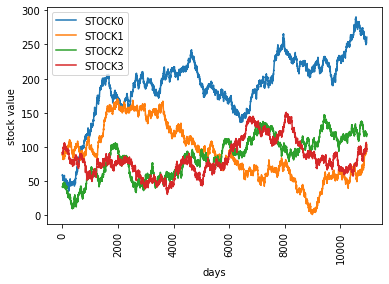

In [14]:
# Let's plot our finanical data (We are generating the same time series data as in the previous example.)
for (cnt, s) in enumerate(data._tickers):
    plt.plot(data._data[cnt], label=s)
plt.legend()
plt.xticks(rotation=90)
plt.xlabel('days')
plt.ylabel('stock value')
plt.show()

## Step 3: Calculate expected return mu and covariance sigma

In [15]:
# Step 3. Calculate mu and sigma for this problem

mu2 = data.get_period_return_mean_vector()   #Returns a vector containing the mean value of each asset.
sigma2 = data.get_period_return_covariance_matrix() #Returns the covariance matrix associated with the assets.
print(mu2, sigma2)

[1.59702144e-04 4.76518943e-04 2.39123234e-04 9.85029012e-05] [[ 4.88319903e-05 -1.07868619e-06 -2.12961489e-06  7.06600109e-07]
 [-1.07868619e-06  9.97360142e-04  3.51594354e-06  3.68715793e-07]
 [-2.12961489e-06  3.51594354e-06  2.87365468e-04  3.20819120e-06]
 [ 7.06600109e-07  3.68715793e-07  3.20819120e-06  1.92316728e-04]]


## Step 4: Set parameters and constraints based on this challenge 1c.

In [16]:
# Step 4. Set parameters and constraints based on this challenge 1c

##############################
# Provide your code here

q2 = 0.5     #Set risk factor to 0.5
budget2 = 3     #Set budget to 3

##############################

## Step 5: Complete code to generate the portfolio instance

In [39]:
# Step 5. Complete code to generate the portfolio instance


##############################
# Provide your code here
bounds_int = [(0, 2), (0, 2), (0, 2), (0, 2)]
portfolio2 = PortfolioOptimization(mu2, sigma2, q2, budget2, bounds = bounds_int)
qp2 = portfolio2.to_quadratic_program()

##############################
print(qp2)

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: Portfolio optimization

Minimize
 obj: - 0.000159702144 x_0 - 0.000476518943 x_1 - 0.000239123234 x_2
      - 0.000098502901 x_3 + [ 0.000048831990 x_0^2 - 0.000002157372 x_0*x_1
      - 0.000004259230 x_0*x_2 + 0.000001413200 x_0*x_3 + 0.000997360142 x_1^2
      + 0.000007031887 x_1*x_2 + 0.000000737432 x_1*x_3 + 0.000287365468 x_2^2
      + 0.000006416382 x_2*x_3 + 0.000192316728 x_3^2 ]/2
Subject To
 c0: x_0 + x_1 + x_2 + x_3 = 3

Bounds
       x_0 <= 2
       x_1 <= 2
       x_2 <= 2
       x_3 <= 2

Generals
 x_0 x_1 x_2 x_3
End



## Step 6: Let's solve the problem using QAOA

**Quantum Approximate Optimization Algorithm (QAOA)** is another variational algorithm that has applications for solving combinatorial optimization problems on near-term quantum systems. This algorithm can also be used to calculate ground states of a Hamiltonian and can be easily implemented by using Qiskit's [**QAOA**](https://qiskit.org/documentation/stubs/qiskit.algorithms.QAOA.html) application. (You will get to learn about QAOA in detail in challenge 4. Let us first focus on the basic implementation of QAOA using Qiskit in this exercise.)


In [40]:
# Step 6. Now let's use QAOA to solve this problem. 

optimizer = SLSQP(maxiter=1000)  
algorithm_globals.random_seed = 1234
backend = Aer.get_backend('statevector_simulator')

##############################
# Provide your code here
quantum_instance = QuantumInstance(backend=backend, seed_simulator=seed, seed_transpiler=seed)
qaoa = QAOA(quantum_instance=quantum_instance)

##############################
qaoa_meo = MinimumEigenOptimizer(qaoa) #please do not change this code

result2 = qaoa_meo.solve(qp2)  #please do not change this code

print(result2) #please do not change this code

optimal function value: -0.00032144003832501437
optimal value: [2. 0. 1. 0.]
status: SUCCESS


Note: The QAOA execution may take up to a few minutes to complete. 

# Submit your answer

In [41]:
# Check your answer and submit using the following code
from qc_grader import grade_ex1c
grade_ex1c(qaoa, qp2)

Submitting your answer for 1c. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


### Further Reading:
For those who have successfully solved the first introductory level challenge, **congratulations!** <br>
I hope you were able to learn something about optimizing portfolios and how you can use Qiskit's Finance module to solve the example problem. <br> If you are interested in further reading, here are a few literature to explore:
<br>
1. [**Quantum optimization using variational algorithms on near-term quantum devices. Moll et al. 2017**](https://arxiv.org/abs/1710.01022)<br>
2. [**Improving Variational Quantum Optimization using CVaR. Barkoutsos et al. 2019.**](https://arxiv.org/abs/1907.04769)<br>

### Good luck and have fun with the challenge!

## Additional information

**Created by:** Yuri Kobayashi

**Version:** 1.0.1